In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from matplotlib.animation import FuncAnimation, PillowWriter

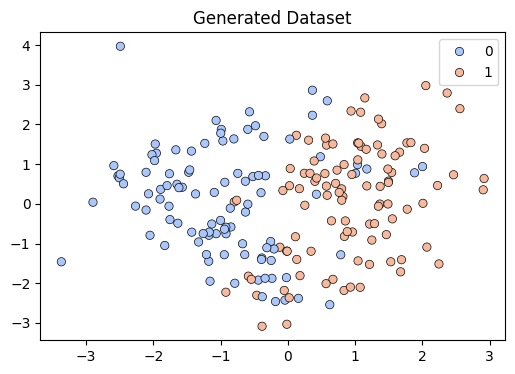

In [2]:
# Generate a simple 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Scatter plot of data
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
plt.title("Generated Dataset")
plt.show()

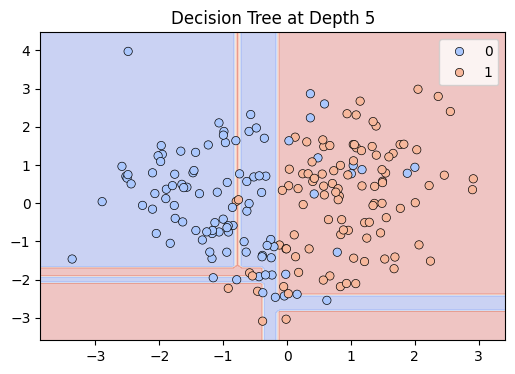

In [4]:
# Create figure for animation
fig, ax = plt.subplots(figsize=(6, 4))

# Initialize Decision Tree
tree = DecisionTreeClassifier(max_depth=None, random_state=42)

# Store frames for animation
frames = []

# Train the Decision Tree incrementally & capture decision boundaries
for depth in range(1, 6):  # Increase depth progressively
    tree.set_params(max_depth=depth)
    tree.fit(X, y)

    # Create meshgrid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict class for each point in grid
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Store the frame as a tuple (depth, decision boundary)
    frames.append((depth, xx, yy, Z))

# Function to update animation
def update(frame):
    ax.clear()
    depth, xx, yy, Z = frame
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    
    # Scatter plot of data
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k", ax=ax)
    
    ax.set_title(f"Decision Tree at Depth {depth}")
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

# Create animation
ani = FuncAnimation(fig, update, frames=frames, interval=1000, repeat=True)

# Save GIF (Optional)
ani.save("decision_tree_growth.gif", writer=PillowWriter(fps=1))

# Show animation
plt.show()
